<a href="https://colab.research.google.com/github/Blackpanther-007/CS229/blob/main/lect_2/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import matplotlib.pyplot as plt

### Synthetic data

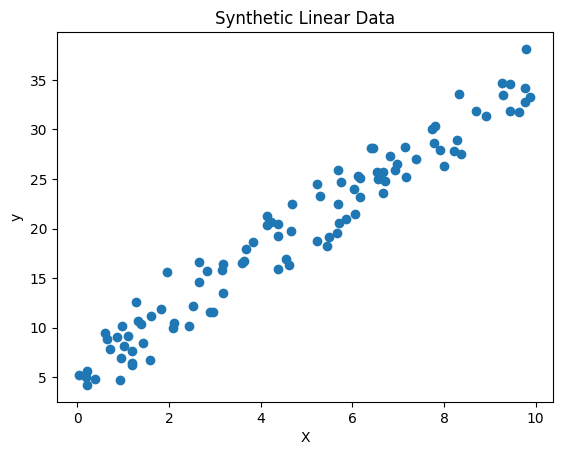

In [76]:
np.random.seed(0)
X = np.random.rand(100, 1) * 10  # Feature: x
y = 3 * X + 5 + np.random.randn(100, 1) * 2
y.shape
plt.scatter(X, y)
plt.title("Synthetic Linear Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [77]:
X_bias = np.c_[np.ones((X.shape[0], 1)), X]
theta = np.zeros((2, 1))

#### Cost function

In [78]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    predictions = X @ theta
    cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
    return cost


In [72]:
def gradient_descent(X, y, theta, alpha, num_iters, tolerance=1e-6):
    m = y.shape[0]
    cost_history = []
    prev_cost = float('inf')

    for i in range(num_iters):
        predictions = X @ theta
        gradient = (1 / m) * (X.T @ (predictions - y))
        theta = theta - alpha * gradient

        current_cost = compute_cost(X, y, theta)
        cost_history.append(current_cost)

        if abs(prev_cost - current_cost) < tolerance:
            print(f"Early stopping at iteration {i}")
            break

        prev_cost = current_cost

    return theta, cost_history

### test on synthetic data

In [79]:
alpha = 0.01
num_iters = 1000
theta_final, cost_history = gradient_descent(X_bias, y, theta, alpha, num_iters)

In [80]:
print("Final theta:", theta_final.ravel())

Final theta: [5.10097212 3.04078232]


In [81]:
y_predict = X_bias @ theta_final

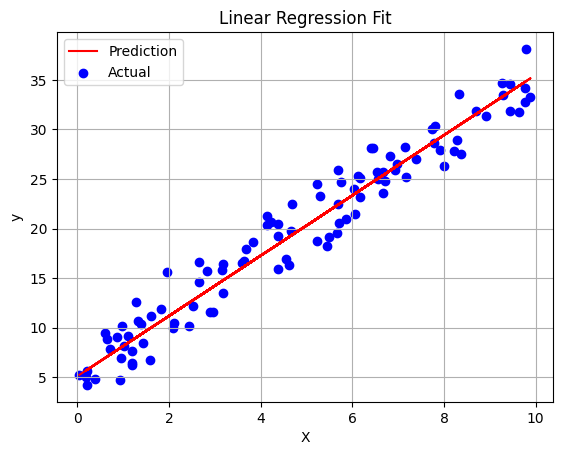

In [84]:

plt.plot(X.flatten(), y_predict.flatten(), 'r-', label='Prediction')
plt.scatter(X.flatten(), y.flatten(), color='blue', label='Actual')
plt.xlabel("X")
plt.ylabel("y")
plt.title("Linear Regression Fit")
plt.legend()
plt.grid(True)
plt.show()